In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import numpy as np # for some data preprocessing
import pandas as pd # providing the pandas dataframe
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
import warnings # to remove warnings within the jupyter file
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv('/content/drive/MyDrive/Health App/heart.csv') # convert csv into pandas data frame

In [20]:
df.head() # to see the top columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
df.shape # to see the shape

(303, 14)

In [22]:
df.info() # To see info about datatype and null values, size etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
df.describe().T # for statistical analysis

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [24]:
df.target.value_counts() # To see the value counts

1    165
0    138
Name: target, dtype: int64

In [25]:
df.groupby("target")["age"].mean() # doing some groupby operation for personal understanding

target
0    56.601449
1    52.496970
Name: age, dtype: float64

# **Exploratory Data Analysis**

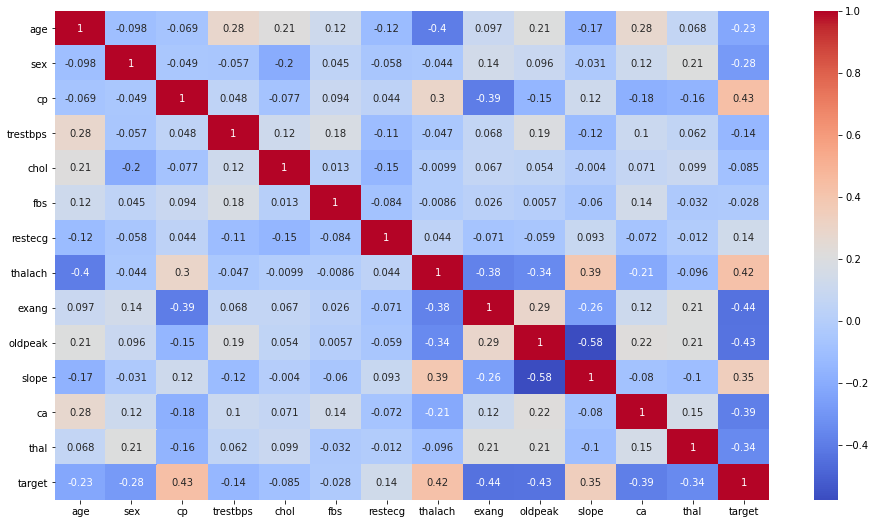

In [29]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm') # Plotting the corrlation heatmap 

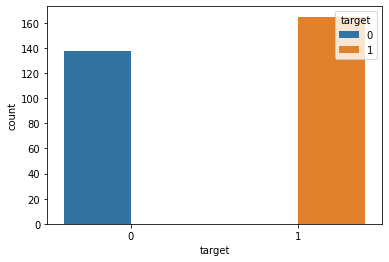

In [30]:
sns.countplot(df.target,hue=df.target) # Plotting countplot for dependent feature target

<Figure size 3600x3600 with 0 Axes>

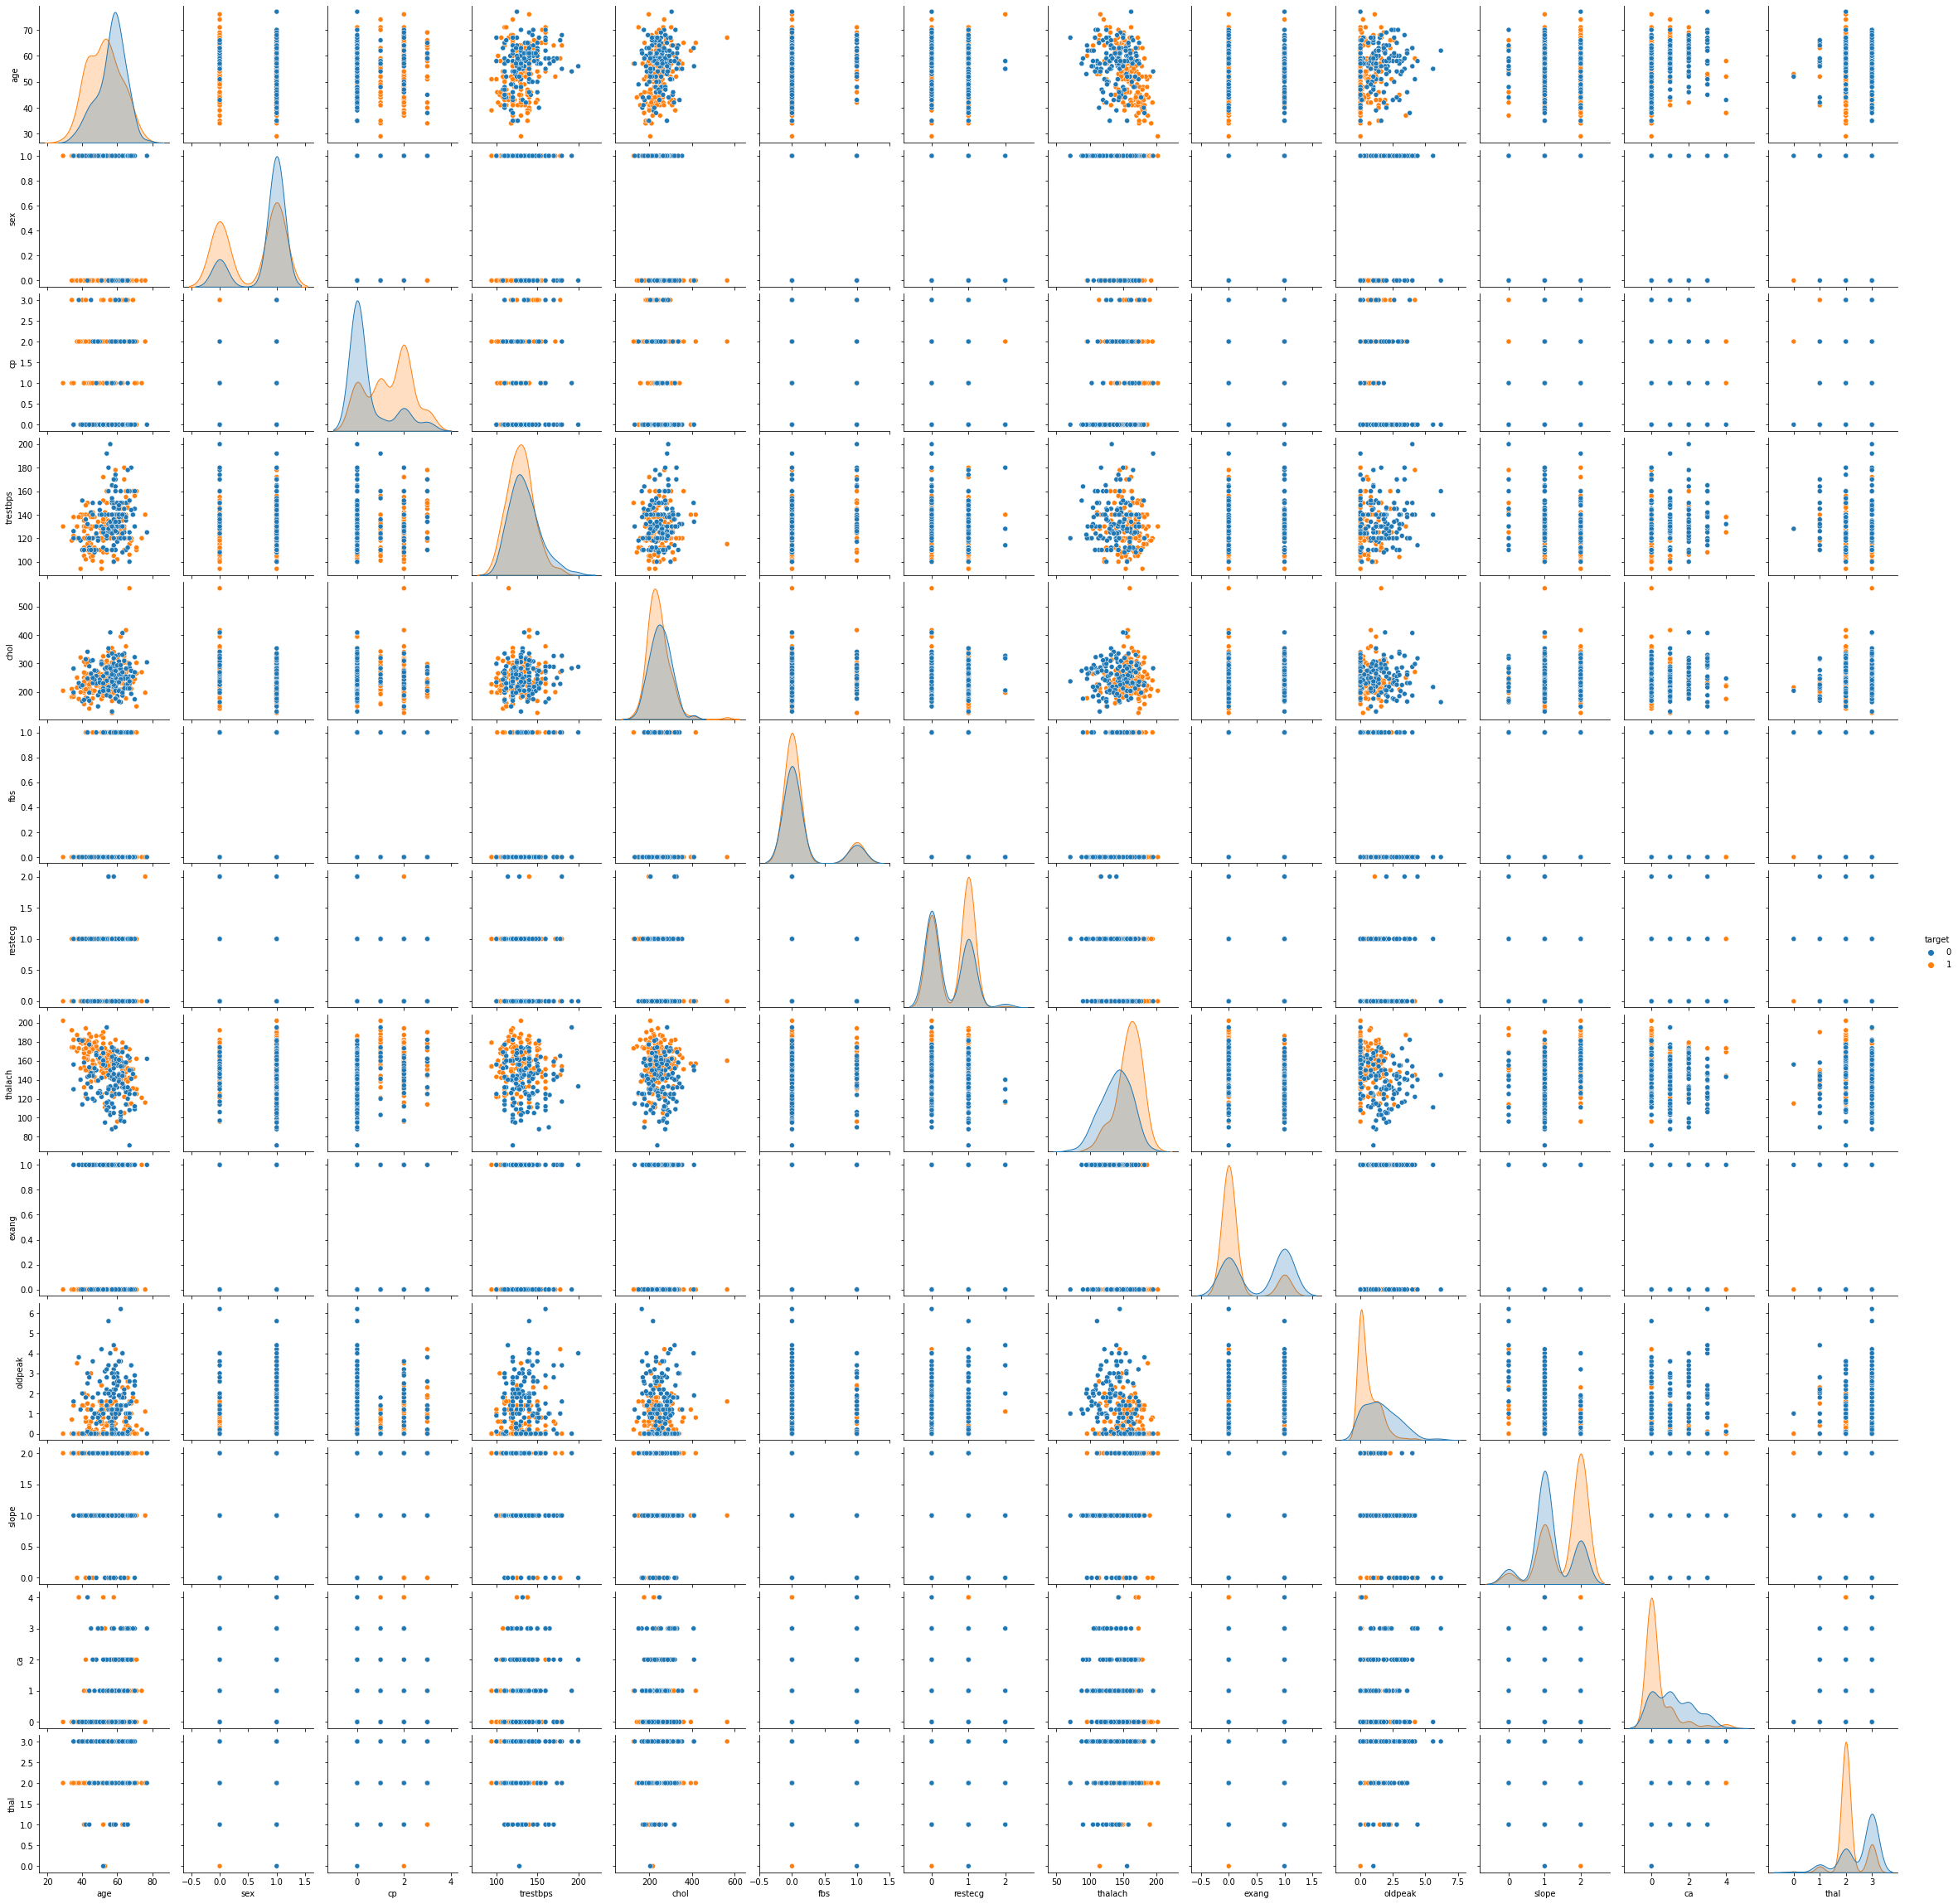

In [34]:
plt.figure(figsize=(50,50))
sns.pairplot(df,hue='target') # plotting pairplot to see the distribution and extract some insigts from the data

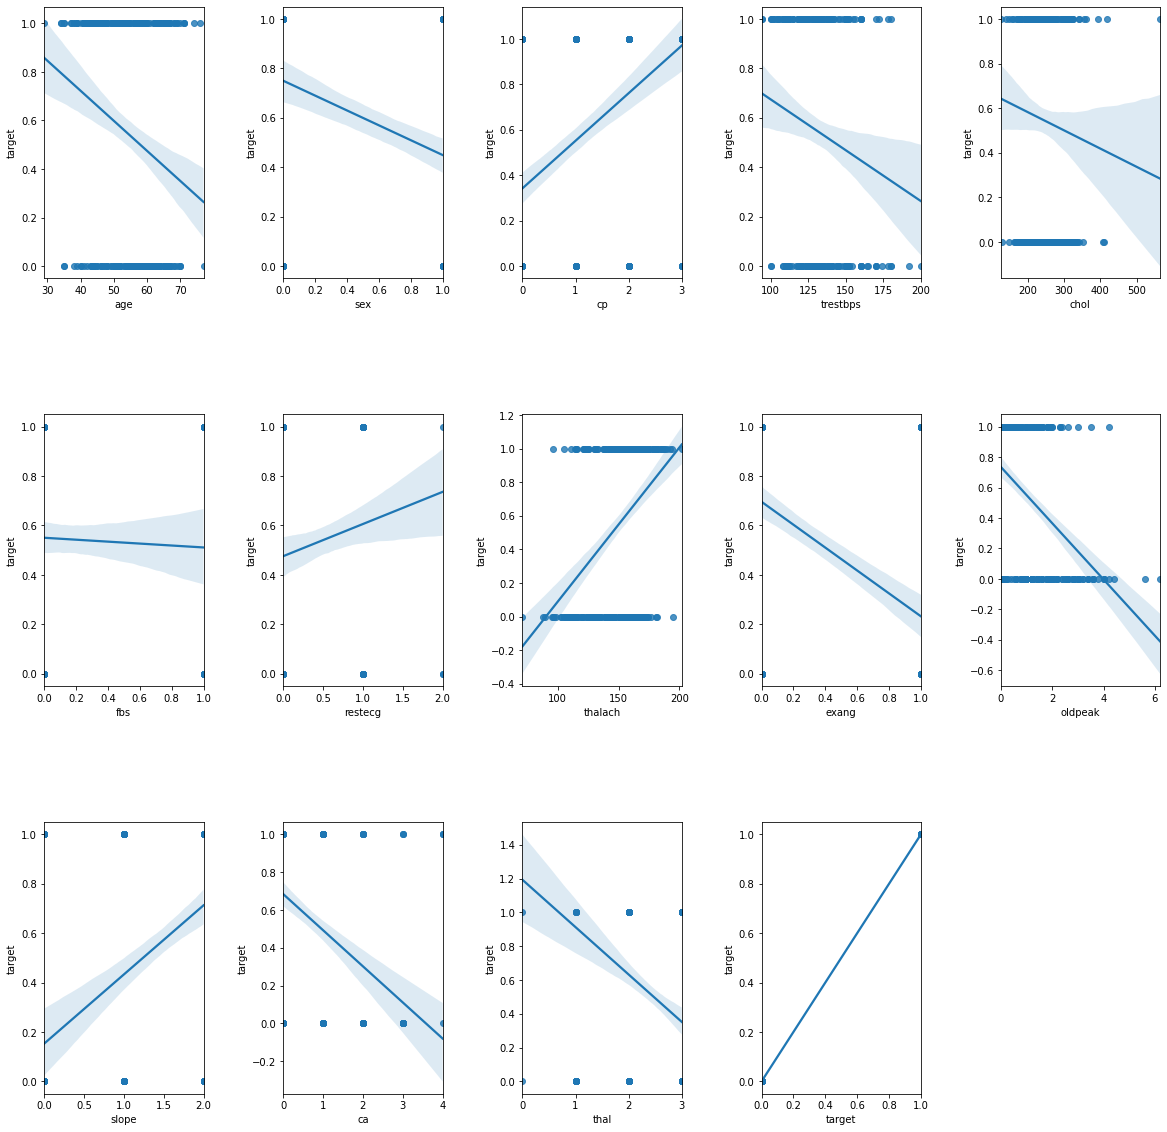

In [38]:
plt.figure(figsize=(20,20))
for i ,col in enumerate(df.columns):
  plt.subplot(3,5,i+1) # Plotting subplot
  plt.subplots_adjust(hspace=0.5,wspace=0.5)  #Adjusted the subplots
  sns.regplot(df[col],df.target) # Plotting the regplot

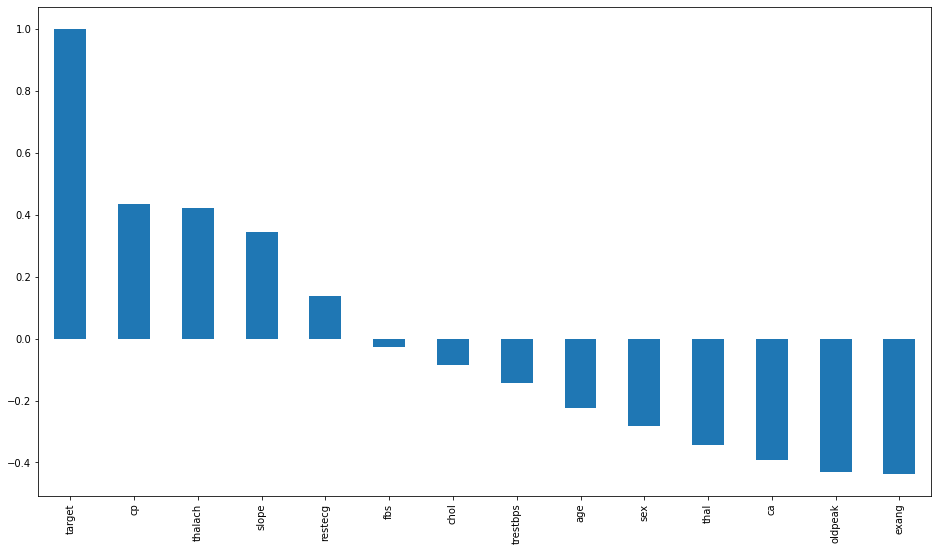

In [44]:
plt.figure(figsize=(16,9))
df.corrwith(df['target']).sort_values(ascending=False).plot.bar() # Plotting the bar based on target Feature

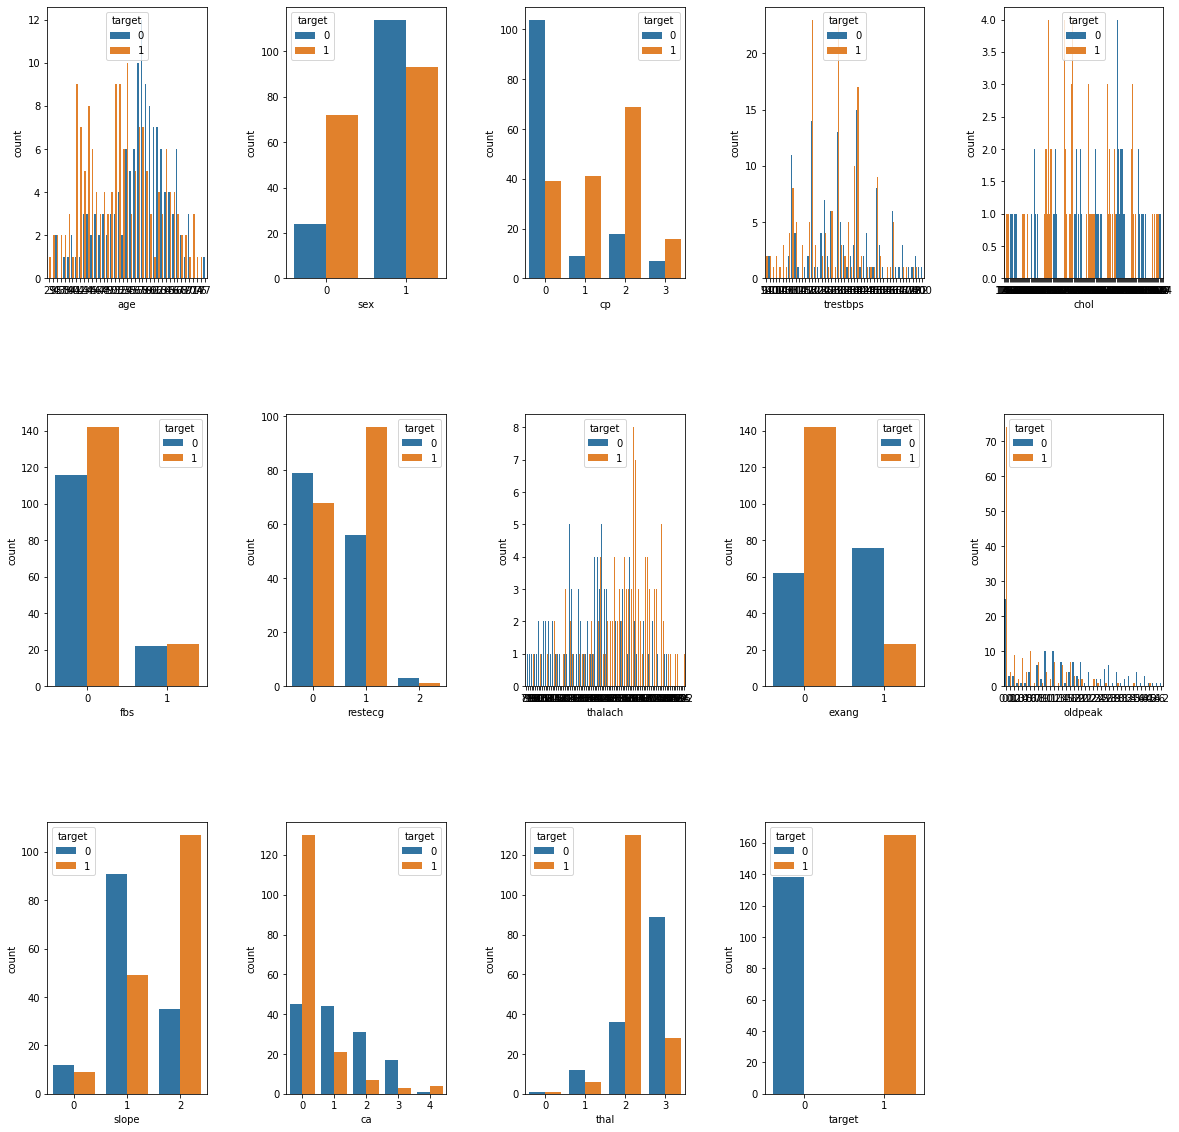

In [45]:
plt.figure(figsize=(20,20))
for i ,col in enumerate(df.columns):
  plt.subplot(3,5,i+1) # Plotting subplot
  plt.subplots_adjust(hspace=0.5,wspace=0.5)  #Adjusted the subplots
  sns.countplot(df[col],hue=df.target) # Plotting the counterplot

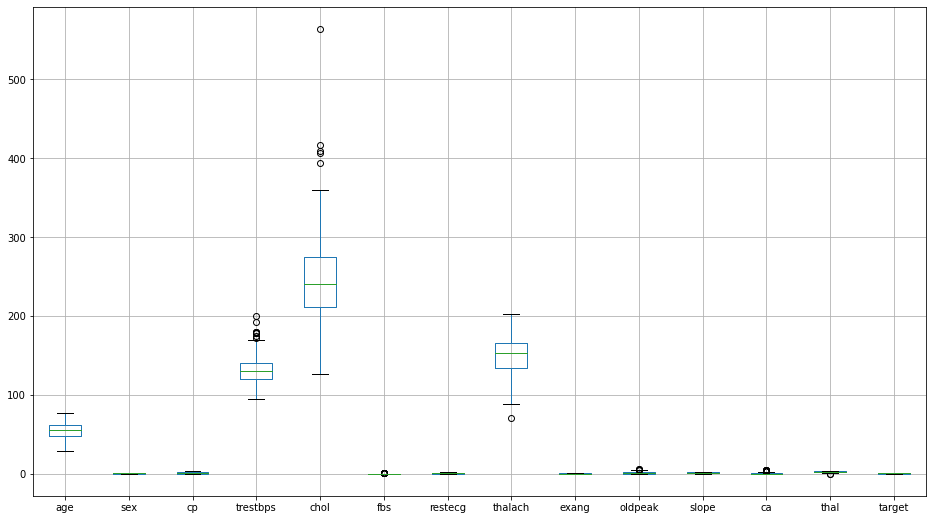

In [48]:
plt.figure(figsize=(16,9))
df.boxplot() # Plotting the boxplts
plt.subplots_adjust(hspace=0.5,wspace=0.5)  #Adjusted the subplots

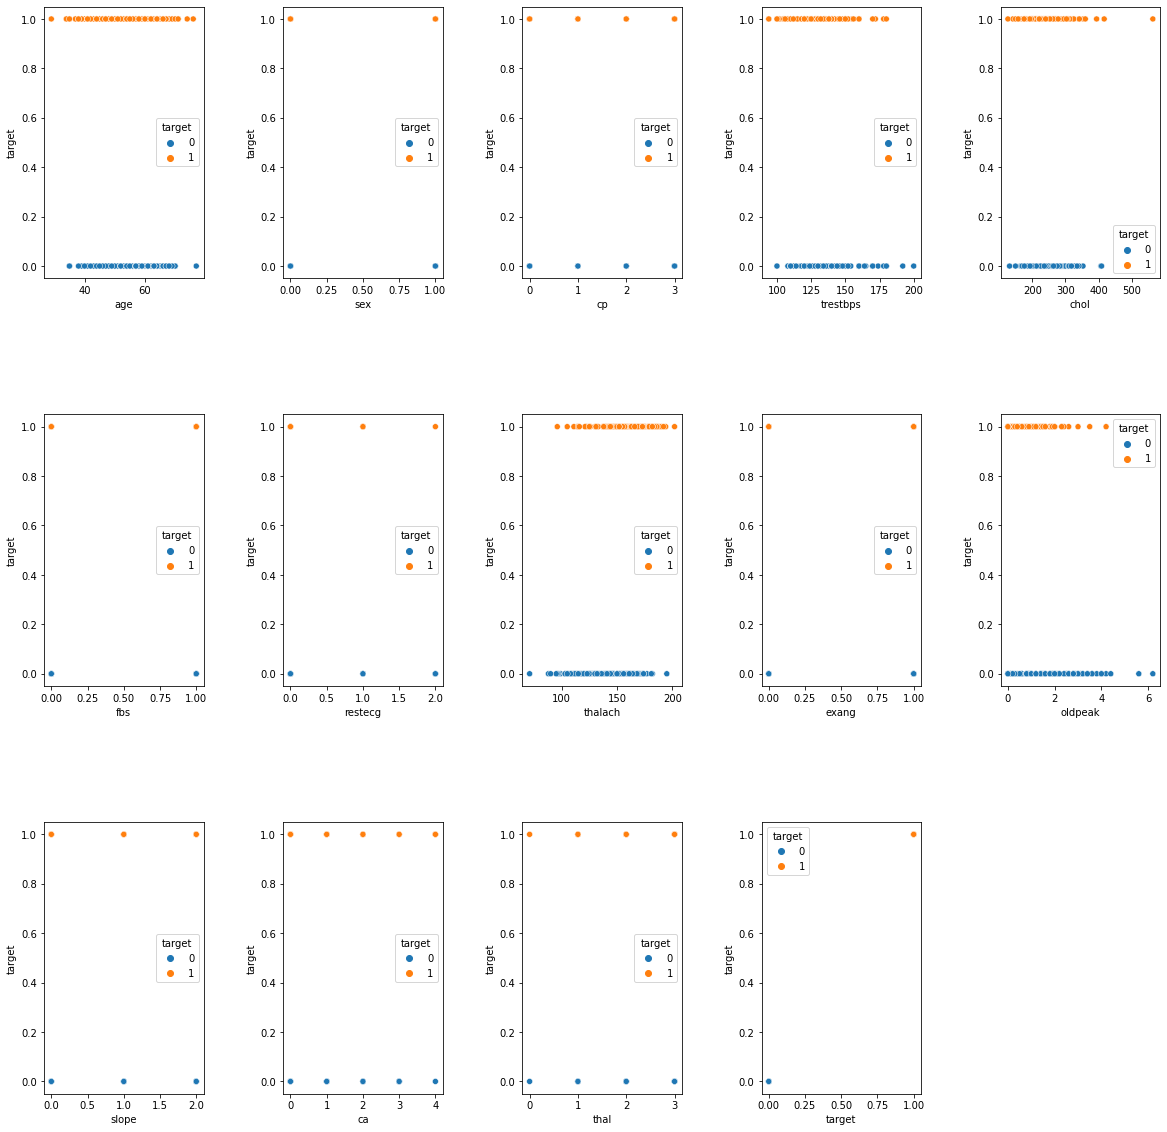

In [50]:
plt.figure(figsize=(20,20))
for i ,col in enumerate(df.columns):
  plt.subplot(3,5,i+1) # Plotting subplot
  plt.subplots_adjust(hspace=0.5,wspace=0.5)  #Adjusted the subplots
  sns.scatterplot(df[col],df.target,hue=df.target) # Plotting the scatterplots

## **Feature Engineering**

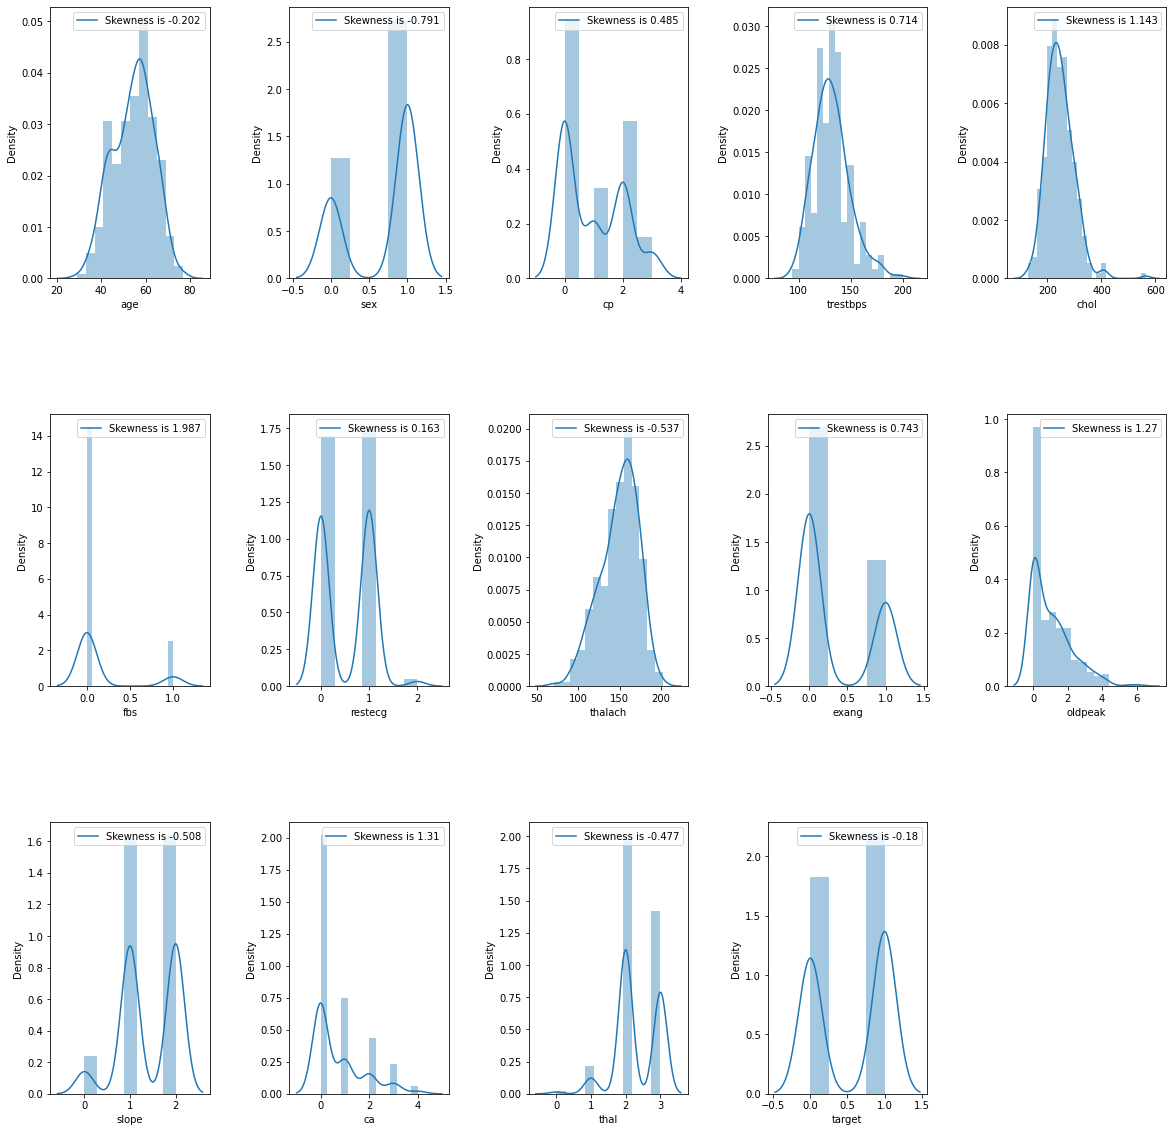

In [53]:
plt.figure(figsize=(20,20))
for i ,col in enumerate(df.columns):
  plt.subplot(3,5,i+1) # Plotting subplot
  plt.subplots_adjust(hspace=0.5,wspace=0.5)  #Adjusted the subplots
  sns.distplot(df[col]).legend([f"Skewness is {df[col].skew().round(3)}" ]) # Plotting the distplots to see the distribution of the data

In [62]:
## Applying log to minimize the skewness
X=df.drop('target',axis=1).copy()
y=df['target'].copy()
for col in X.columns:
  X[col]=np.log(X[col]+1) # 1 is adding to avoid the undefined error because log(0) is undefined in math


In [63]:
X.head() # To verify the log

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,4.158883,0.693147,1.386294,4.983607,5.455321,0.693147,0.000000,5.017280,0.000000,1.193922,0.000000,0.0,0.693147
1,3.637586,0.693147,1.098612,4.875197,5.525453,0.000000,0.693147,5.236442,0.000000,1.504077,0.000000,0.0,1.098612
2,3.737670,0.000000,0.693147,4.875197,5.323010,0.000000,0.000000,5.153292,0.000000,0.875469,1.098612,0.0,1.098612
3,4.043051,0.693147,0.693147,4.795791,5.468060,0.000000,0.693147,5.187386,0.000000,0.587787,1.098612,0.0,1.098612
4,4.060443,0.000000,0.000000,4.795791,5.872118,0.000000,0.693147,5.099866,0.693147,0.470004,1.098612,0.0,1.098612


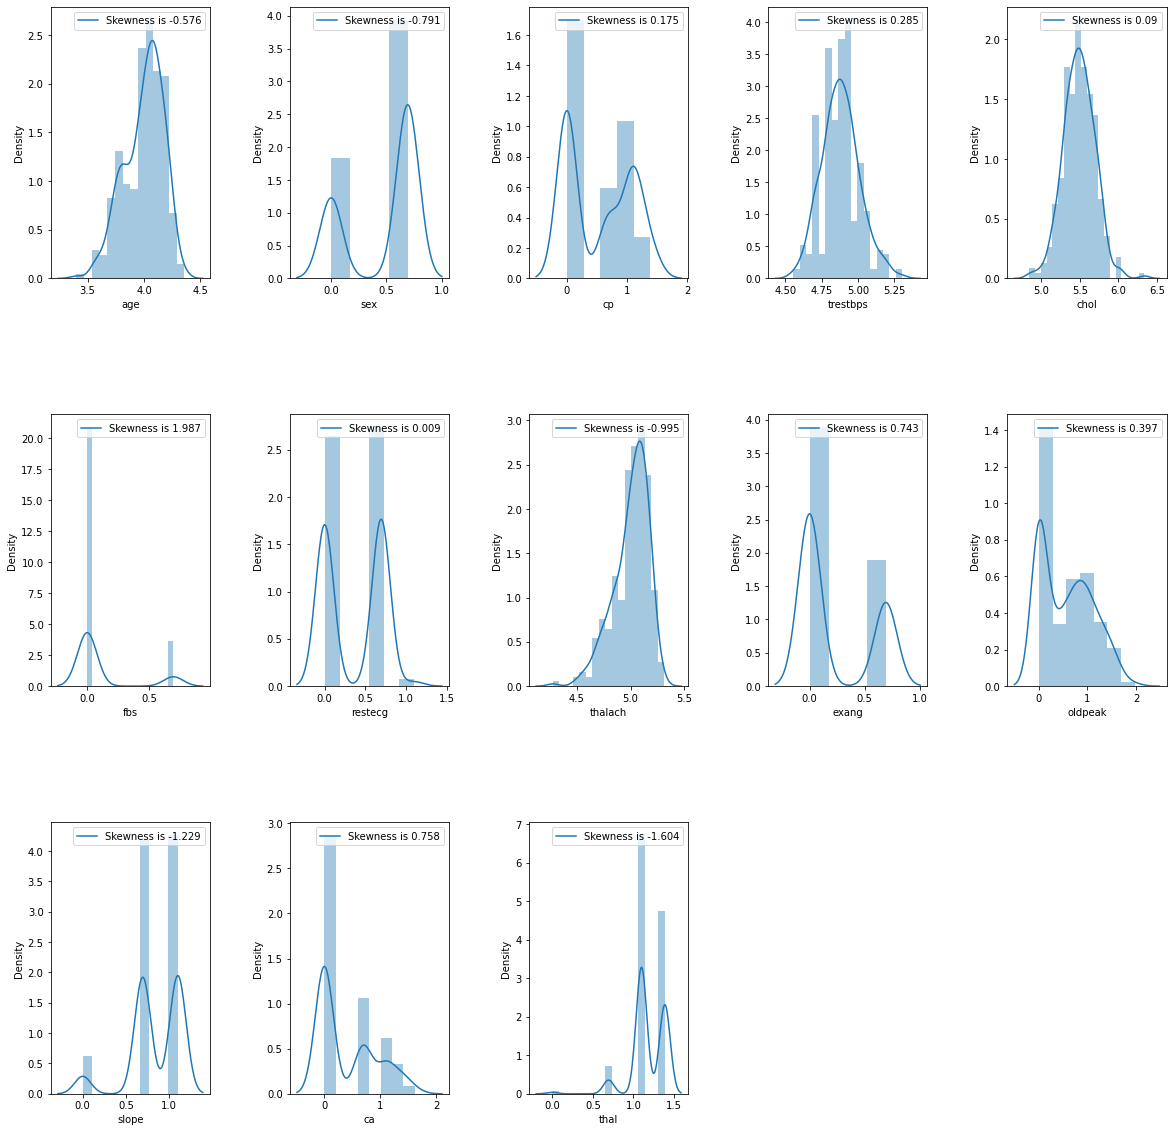

In [64]:
plt.figure(figsize=(20,20))
for i ,col in enumerate(X.columns):
  plt.subplot(3,5,i+1) # Plotting subplot
  plt.subplots_adjust(hspace=0.5,wspace=0.5)  #Adjusted the subplots
  sns.distplot(X[col]).legend([f"Skewness is {X[col].skew().round(3)}" ]) # Plotting the distplots to see the distribution of the data

In [65]:
# So the skewness is minimized

## **Training the Model**

In [66]:
from sklearn.model_selection import train_test_split # For splitting the data

In [70]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2) # splitting the data into x_train,x_test,y_test,y_test

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

In [71]:
from sklearn.linear_model import LogisticRegression # importing the LogisticRegression to train the model

In [101]:
lr=LogisticRegression() # initialize the LogisticRegression model
lr.fit(x_train,y_train) # fitting the model for x_train,y_train
y_pred=lr.predict(x_test) # predicting the x_test model
lr.score(x_test,y_test) # calculating the score/accuracy of the model

0.8360655737704918

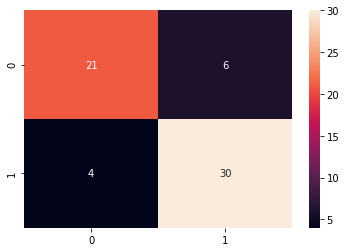

In [102]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d') # seeing the confusion matrix by using heatmap

In [103]:
from sklearn.ensemble import RandomForestClassifier # importing the RandomForestClassifier to train the model

In [104]:
rf=RandomForestClassifier() # initialize the RandomForestClassifier model
rf.fit(x_train,y_train) # fitting the model for x_train,y_train
y_pred=rf.predict(x_test) # predicting the x_test model
rf.score(x_test,y_test) # calculating the score/accuracy of the model

0.8524590163934426

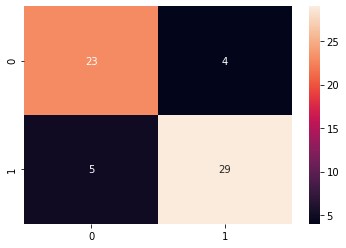

In [105]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d') # seeing the confusion matrix by using heatmap

In [106]:
from sklearn.svm import SVC # importing the SVC to train the model

In [107]:
sv=SVC() # initialize the SVC model
sv.fit(x_train,y_train) # fitting the model for x_train,y_train
y_pred=sv.predict(x_test) # predicting the x_test model
sv.score(x_test,y_test) # calculating the score/accuracy of the model

0.819672131147541

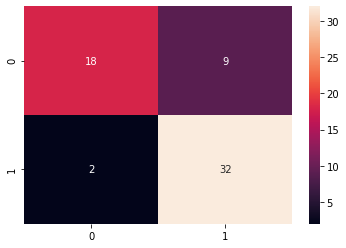

In [108]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d') # seeing the confusion matrix by using heatmap

In [109]:
from sklearn.ensemble import AdaBoostClassifier # importing the RandomForestClassifier to train the model

In [110]:
ab=AdaBoostClassifier() # initialize the AdaBoostClassifier model
ab.fit(x_train,y_train) # fitting the model for x_train,y_train
y_pred=ab.predict(x_test) # predicting the x_test model
ab.score(x_test,y_test) # calculating the score/accuracy of the model

0.9016393442622951

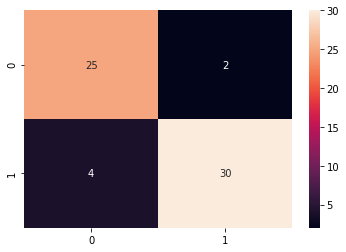

In [111]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d') # seeing the confusion matrix by using heatmap

In [112]:
from sklearn.ensemble import GradientBoostingClassifier # importing the GradientBoostingClassifier to train the model

In [113]:
gb=GradientBoostingClassifier() # initialize the GradientBoostingClassifier model
gb.fit(x_train,y_train) # fitting the model for x_train,y_train
y_pred=gb.predict(x_test) # predicting the x_test model
gb.score(x_test,y_test) # calculating the score/accuracy of the model

0.819672131147541

In [114]:
import xgboost # importing the xgboost to train the model

In [115]:
xg=xgboost.XGBClassifier() # initialize the xgboost model
xg.fit(x_train,y_train) # fitting the model for x_train,y_train
y_pred=xg.predict(x_test) # predicting the x_test model
xg.score(x_test,y_test) # calculating the score/accuracy of the model

0.8524590163934426

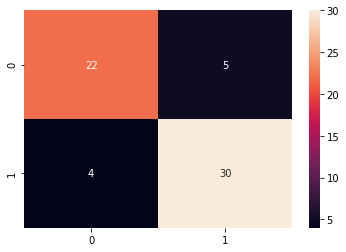

In [116]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d') # seeing the confusion matrix by using heatmap

## Adaboost gives us the high accuracy see whether by some Hyperparameter tuning it gives more or not! 

In [93]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV # Hyperparameter models

In [94]:
ada=AdaBoostClassifier()
params={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
abc_grid=GridSearchCV(estimator=ada,param_grid=params,n_jobs=1,cv=5,verbose=3)
abc_grid.fit(x_train,y_train) # Fiting the x_train,y_train
abc_grid.score(x_test,y_test) # calculating the score for x_test,y_test

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] learning_rate=0.001, n_estimators=500 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.001, n_estimators=500, score=0.755, total=   0.7s
[CV] learning_rate=0.001, n_estimators=500 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  learning_rate=0.001, n_estimators=500, score=0.837, total=   0.7s
[CV] learning_rate=0.001, n_estimators=500 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  learning_rate=0.001, n_estimators=500, score=0.854, total=   0.7s
[CV] learning_rate=0.001, n_estimators=500 ...........................
[CV]  learning_rate=0.001, n_estimators=500, score=0.646, total=   0.7s
[CV] learning_rate=0.001, n_estimators=500 ...........................
[CV]  learning_rate=0.001, n_estimators=500, score=0.854, total=   0.6s
[CV] learning_rate=0.001, n_estimators=1000 ..........................
[CV]  learning_rate=0.001, n_estimators=1000, score=0.776, total=   1.3s
[CV] learning_rate=0.001, n_estimators=1000 ..........................
[CV]  learning_rate=0.001, n_estimators=1000, score=0.837, total=   1.3s
[CV] learning_rate=0.001, n_estimators=1000 ..........................
[CV]  learning_rate=0.001, n_estimators=1000, score=0.854, total=   1.3s
[CV] learning_rate=0.001, n_estimators=1000 ..........................
[CV]  learning_rate=0.001, n_estimators=1000, score=0.646, total=   1.3s
[CV] learning_rate=0.001, n_estimators=1000 ......................

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.1min finished


0.8524590163934426

In [95]:
ab_random=RandomizedSearchCV(ada,params,cv=5,n_jobs=-1,verbose=3) #initialize RandomizedSearchCV with the params
ab_random.fit(x_train,y_train) # Fiting the x_train,y_train
ab_random.score(x_test,y_test) # calculating the score for x_test,y_test

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   29.9s finished


0.8524590163934426

So it doesnot give us the  better accuracy so we go with the default one 

In [117]:
ab=AdaBoostClassifier() # initialize the AdaBoostClassifier model
ab.fit(x_train,y_train) # fitting the model for x_train,y_train
y_pred=ab.predict(x_test) # predicting the x_test model
ab.score(x_test,y_test) # calculating the score/accuracy of the model

0.9016393442622951

In [119]:
print(classification_report(y_test,y_pred)) # classification report for adaboost

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.94      0.88      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



## ***Model Saving***

In [120]:
import pickle  ## Import Pickle to save the model
  
filename = '/content/drive/MyDrive/Health App/Model/Heart_disease_ab_0.90_model.sav' #specifying the path to save the model
pickle.dump(ab, open(filename, 'wb')) # Finally dump the model